**IMPORTING THE REQUIRED LIBRARIES**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**LOADING THE DATASET**

In [20]:
df = pd.read_csv('MSFT.csv')

**HANDLING THE MISSING VALUES USING SIMPLE IMPUTER IN SKLEARN**

In [21]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:

# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = df.fillna(df.mean())  # Fill missing values with mean values

<ipython-input-22-5be8887a7716>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())  # Fill missing values with mean values


**ENCODING THE CATEGORICAL VALUES IS NOT REQUIRED BECAUSE THERE IS NO CATEGORICAL DATA IN THE DATASET**

**SPLITING THE DATA INTO TRAIN SET AND TEST SET**

In [23]:
# Select relevant columns
df= df[['Date', 'Close', 'Volume']]

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Create lag features (optional, for time series data)
df['Close_Lag1'] = df['Close'].shift(1)
df.dropna(inplace=True)
X = df[['Close_Lag1', 'Volume']]  # Features
y = df['Close']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-23-3748f3c8fef9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-23-3748f3c8fef9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_Lag1'] = df['Close'].shift(1)
<ipython-input-23-3748f3c8fef9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

**FEATURE SCALING USING MINMAXSCALER**

In [24]:
# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

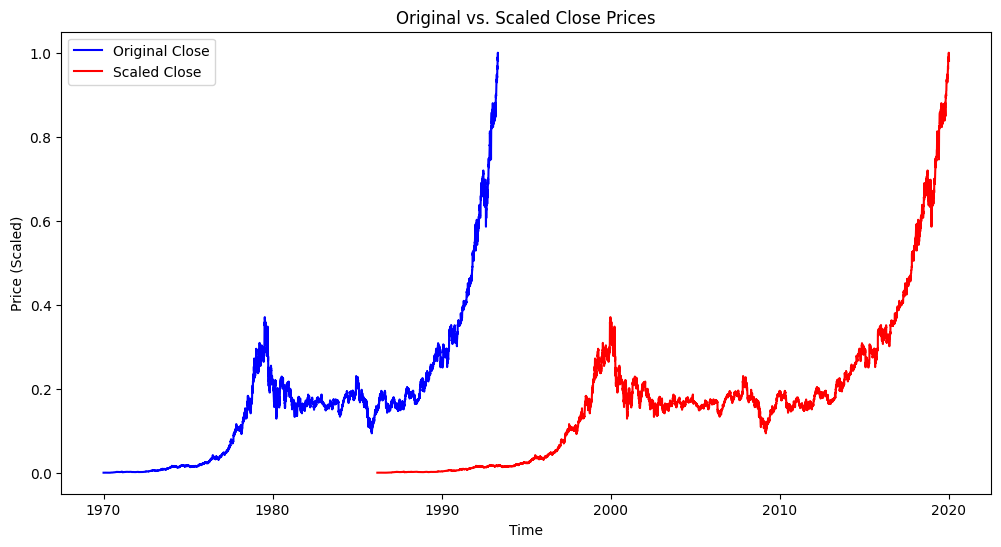

In [25]:
import matplotlib.pyplot as plt
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
original_close = df['Close'].values.reshape(-1, 1)
scaled_close = df['Close']

plt.figure(figsize=(12, 6))
plt.plot(original_close, label='Original Close', color='blue')
plt.plot(scaled_close, label='Scaled Close', color='red')
plt.title('Original vs. Scaled Close Prices')
plt.xlabel('Time')
plt.ylabel('Price (Scaled)')
plt.legend()
plt.show()